In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

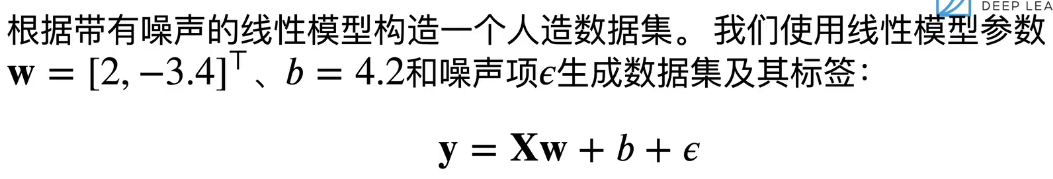

In [2]:
def synthetic_data(w, b, num_examples):
    "生成y=Xw+b+噪声。"
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape) # 加噪音
    return X, y.reshape((-1, 1)) # 展成列向量

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

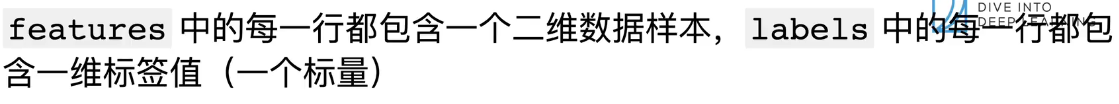

In [3]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([0.5223, 0.0946]) 
label: tensor([4.9169])


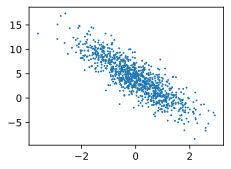

In [13]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1);

定义一个data_iter函数，该函数接收批量大小、特征矩阵和标签向量作为输入，生成大小为batch_size的小批量。

In [16]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) # 打乱样本顺序
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

n = 0
for X, y in data_iter(batch_size, features, labels):
    # print(X, '\n', y)
    n += 1
print(n)

100


In [17]:
# 定义初始化模型参数
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [19]:
# 定义模型
def linreg(X, w, b):
    "线性回归模型。"
    return torch.matmul(X, w) + b

In [20]:
# 定义损失函数
def squared_loss(y_hat, y):
    "均方损失"
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [21]:
# 定义优化算法
def sgd(params, lr, batch_size):
    "小批量随机梯度下降"
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [22]:
# 训练过程
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.043617
epoch 2, loss 0.000168
epoch 3, loss 0.000047


In [24]:
print(f'w的估计误差：{true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差：{true_b - b}')

w的估计误差：tensor([0.0003, 0.0003], grad_fn=<SubBackward0>)
b的估计误差：tensor([0.0010], grad_fn=<RsubBackward1>)
